In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
import os

leagues = []

directory = "../league"
count = 1
for filename in os.listdir(directory):
    table = pd.read_csv(directory + "/" + filename)
    leagues.append(table)

In [3]:
goals = []
for league in leagues:
    goals.append(league["GF"].sum())

In [4]:
scorers = [
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Lionel Messi",
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Cristiano Ronaldo",
    "Luis Suarez",
    "Lionel Messi",
    "Lionel Messi",
    "Lionel Messi"
]

In [5]:
seasons = ["09/10","10/11","11/12","12/13","13/14","14/15","15/16","16/17","17/18","18/19"]

In [6]:
points = []
for league in leagues:
    points.append(league["Pts"].sum())

In [7]:
points

[1045, 1061, 1046, 1056, 1054, 1049, 1048, 1051, 1054, 1030]

In [8]:
avg_points = []
for league in leagues:
    avg_points.append(league["Pts"].mean())

In [9]:
avg_points

[52.25, 53.05, 52.3, 52.8, 52.7, 52.45, 52.4, 52.55, 52.7, 51.5]

In [10]:
avg_goals = []
for league in leagues:
    avg_goals.append(league["GF"].mean())

In [11]:
avg_goals

[51.55, 52.1, 52.5, 54.55, 52.25, 50.45, 52.15, 55.9, 51.2, 49.15]

In [12]:
goals

[1031, 1042, 1050, 1091, 1045, 1009, 1043, 1118, 1024, 983]

In [13]:
gpg = []
for league in leagues:
    gpg.append(league["GF"].sum() / 760)

In [14]:
gpg = [round(gp,2) for gp in gpg]

In [15]:
ppg = []
for league in leagues:
    ppg.append(league["Pts"].sum() / 760)

In [16]:
ppg = [round(pp,2) for pp in ppg]

In [17]:
columns = ["season","tot_pts","avg_pts","tot_goals","avg_goals","gpg","ppg"]
data = np.array([seasons,points,avg_points,goals,avg_goals,gpg,ppg])

In [18]:
seasons_df = pd.DataFrame()
for index,column in enumerate(columns):
    seasons_df[column] = data[index]

In [19]:
seasons_df.index = list(range(1,11))

In [20]:
seasons_df

,season,tot_pts,avg_pts,tot_goals,avg_goals,gpg,ppg
1,09/10,1045,52.25,1031,51.55,1.36,1.38
2,10/11,1061,53.05,1042,52.1,1.37,1.4
3,11/12,1046,52.3,1050,52.5,1.38,1.38
4,12/13,1056,52.8,1091,54.55,1.44,1.39
5,13/14,1054,52.7,1045,52.25,1.38,1.39
6,14/15,1049,52.45,1009,50.45,1.33,1.38
7,15/16,1048,52.4,1043,52.15,1.37,1.38
8,16/17,1051,52.55,1118,55.9,1.47,1.38
9,17/18,1054,52.7,1024,51.2,1.35,1.39
10,18/19,1030,51.5,983,49.15,1.29,1.36


In [21]:
for column in columns[1:]:
    seasons_df[column] = seasons_df[column].astype(np.dtype("float64"),copy=True)

In [22]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     10 non-null     object 
 1   tot_pts    10 non-null     float64
 2   avg_pts    10 non-null     float64
 3   tot_goals  10 non-null     float64
 4   avg_goals  10 non-null     float64
 5   gpg        10 non-null     float64
 6   ppg        10 non-null     float64
dtypes: float64(6), object(1)
memory usage: 640.0+ bytes


In [23]:
seasons_df

,season,tot_pts,avg_pts,tot_goals,avg_goals,gpg,ppg
1,09/10,1045.0,52.25,1031.0,51.55,1.36,1.38
2,10/11,1061.0,53.05,1042.0,52.10,1.37,1.40
3,11/12,1046.0,52.30,1050.0,52.50,1.38,1.38
4,12/13,1056.0,52.80,1091.0,54.55,1.44,1.39
5,13/14,1054.0,52.70,1045.0,52.25,1.38,1.39
6,14/15,1049.0,52.45,1009.0,50.45,1.33,1.38
7,15/16,1048.0,52.40,1043.0,52.15,1.37,1.38
8,16/17,1051.0,52.55,1118.0,55.90,1.47,1.38
9,17/18,1054.0,52.70,1024.0,51.20,1.35,1.39
10,18/19,1030.0,51.50,983.0,49.15,1.29,1.36


In [24]:
seasons_df["highest_scorers"] = scorers

In [25]:
champions = []
for league in leagues:
    champions.append(league["Team"][0])

In [29]:
seasons_df["champions"] = champions

Text(0.5, 1.0, 'Highest Goal Scorers')

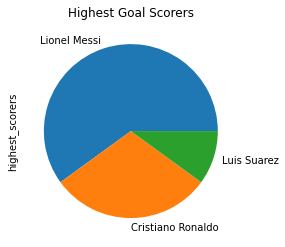

In [30]:
seasons_df["highest_scorers"].value_counts().plot(kind="pie")
plt.title("Highest Goal Scorers")

<AxesSubplot:ylabel='champions'>

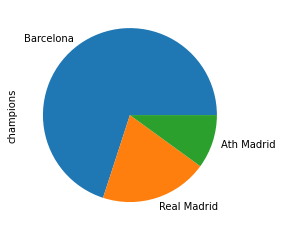

In [41]:
seasons_df["champions"].value_counts().plot(kind="pie")

<AxesSubplot:xlabel='tot_goals'>

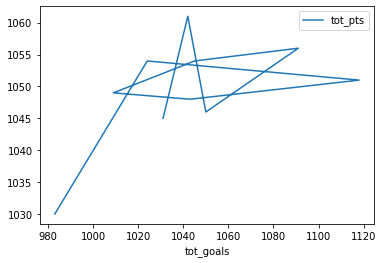

In [32]:
seasons_df.plot(x="tot_goals",y="tot_pts",kind="line")

Text(0, 0.5, 'goals')

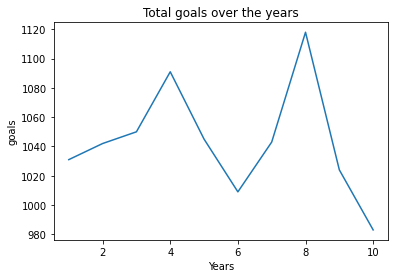

In [37]:
plt.plot(range(1,11), seasons_df["tot_goals"])
plt.title("Total goals over the years")
plt.xlabel("Years")
plt.ylabel("goals")

In [60]:
path = "../data/"

In [62]:
old = {}
count = "9"
for filename in os.listdir(path):
    if filename.endswith("csv"):
        old[f"league_{count}"] = pd.read_csv(filename)
        count = str(int(count)+1)

In [65]:
old["league_10"]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,SP1,28/08/10,Hercules,Ath Bilbao,0,1,A,0,0,D,...,2.26,2.12,1.73,1.67,25,0.00,1.92,1.84,2.10,1.95
1,SP1,28/08/10,Levante,Sevilla,1,4,A,1,2,A,...,2.05,1.95,1.92,1.82,15,0.00,2.75,2.54,1.53,1.48
2,SP1,28/08/10,Malaga,Valencia,1,3,A,1,1,D,...,2.14,2.04,1.80,1.74,19,0.00,2.25,2.08,1.83,1.71
3,SP1,29/08/10,Espanol,Getafe,3,1,H,1,0,H,...,2.43,2.25,1.65,1.60,21,0.00,1.57,1.51,2.69,2.48
4,SP1,29/08/10,La Coruna,Zaragoza,0,0,D,0,0,D,...,2.40,2.21,1.67,1.62,19,0.00,1.54,1.49,2.64,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,21/05/11,Mallorca,Ath Madrid,3,4,A,0,2,A,...,1.75,1.70,2.19,2.09,23,0.00,1.77,1.71,2.26,2.17
376,SP1,21/05/11,Osasuna,Villarreal,1,0,H,1,0,H,...,2.00,1.90,1.98,1.89,21,-0.50,1.86,1.81,2.12,2.07
377,SP1,21/05/11,Real Madrid,Almeria,8,1,H,2,1,H,...,1.25,1.23,4.30,3.90,19,-2.25,1.75,1.69,2.29,2.24
378,SP1,21/05/11,Santander,Ath Bilbao,1,2,A,0,2,A,...,1.72,1.64,2.26,2.15,20,0.25,2.01,1.97,1.96,1.91


In [66]:
def extract_team_wins(df, source: str, col: str, name: str,mode: str="H") -> int:
        """extracts a team from a column
        
        df: the dataframe we want to extract the team -> pandas DataFrame

        source: the name of the column we want to split the dataframe from -> str

        col: the name of the column we wish to extract from -> str
        
        name: the name of the team we want to extract -> str
        """
        names = df[df[source] == name]
        temp = names[col]
        res = 0
        for item in temp:
            if item == mode:
                res += 1
        return res

In [82]:
old["league_10"]["FTR"].value_counts()[0]

197

In [89]:
home_wins = []
away_wins = []
draw = []
for ol in old:
    home_wins.append(old[ol]["FTR"].value_counts()[0])
    away_wins.append(old[ol]["FTR"].value_counts()[1])
    draw.append(old[ol]["FTR"].value_counts()[2])

In [90]:
home_wins

[194, 197, 188, 189, 179, 171, 183, 181, 179, 168]

In [91]:
home_dict = dict(zip(["H","A","D"],[home_wins,away_wins,draw]))

In [92]:
home_df = pd.DataFrame(home_dict)

In [93]:
home_df

,H,A,D
0,194,95,91
1,197,104,79
2,188,98,94
3,189,107,84
4,179,115,86
5,171,118,91
6,183,105,92
7,181,110,89
8,179,115,86
9,168,110,102


Text(0, 0.5, 'wins')

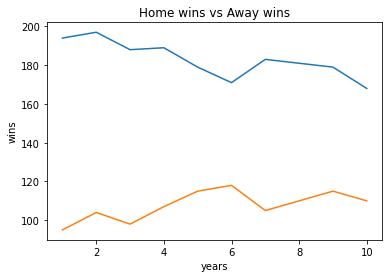

In [96]:
plt.plot(range(1,11),home_df["H"], label="home")
plt.plot(range(1,11),home_df["A"])

plt.title("Home wins vs Away wins")
plt.xlabel("years")
plt.ylabel("wins")

In [99]:
sum([item / 380 * 100 for item in home_df["H"]])

481.3157894736842

In [100]:
sum([item / 380 * 100 for item in home_df["A"]])

283.421052631579

In [101]:
sum([item / 380 * 100 for item in home_df["D"]])

235.26315789473685

In [102]:
48.1 + 28.3 + 23.5

99.9